<a href="https://colab.research.google.com/github/packtpublishing/Machine-Learning-for-Imbalanced-Data/blob/main/chapter04/chapter04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# !pip install imbalanced-learn==0.10.1

import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')

# Plotting helper function

In [18]:
X_tr = pd.read_csv('/kaggle/input/Train_60 2/X_Train_Data_Input.csv')
y_tr = pd.read_csv('/kaggle/input/Train_60 2/Y_Train_Data_Target.csv')
X_te = pd.read_csv('/kaggle/input/Train_60 2/X_Test_Data_Input_20.csv')
y_te = pd.read_csv('/kaggle/input/Train_60 2/Y_Test_Data_Target_20.csv')

In [19]:
data = pd.merge(X_tr, y_tr, on='ID')
data.head()

ID  Column0  Column1  Column2   Column3  \
0  ad1a67e4cbddc767a3456b0d94299b9e      2.0     2495   3726.0  0.678139   
1  7246d2f76ac0c217ec25e72ea5f014cb      0.0     2495   3454.0  0.452580   
2  22ba388e7dd14c13342c49e75fc29dda      2.0     2495   4543.0 -1.577453   
3  59f9b981472d97342587fb3e6392aeb1      0.0      211     59.0       NaN   
4  f6317cf7ecf126859804eddff279aead      0.0      718    950.0 -2.028572   

    Column4   Column5   Column6   Column7   Column8  ...  Column13  Column14  \
0  0.701403 -0.007468  0.434190 -0.015603  0.606265  ...         0  0.001351   
1  0.701403 -0.007468  1.554998 -0.015574  0.329946  ...         0  0.001351   
2 -1.429540 -0.007469 -0.407939 -0.015607 -0.774979  ...         1  0.001351   
3       NaN       NaN -0.407939 -0.015607 -0.774979  ...         0       NaN   
4 -1.855728       NaN -0.407939 -0.015607 -0.774979  ...         0       NaN   

   Column15  Column16  Column17  Column18  Column19  Column20  Column21  \
0   0.00339       0.0         0       0.0         0         0         0   
1   0.00339       0.0         0       0.0         0         0         0   
2   0.00339       0.0         0       0.0         0         0         0   
3   0.00339       0.0         0       1.0         0         0         0   
4   0.00339       0.0         0       0.0         0         0         0   

   target  
0       0  
1       0  
2       0  
3       1  
4       0  

[5 rows x 24 columns]

In [20]:
data1 = pd.merge(X_te, y_te, on='ID')
data1.head()

ID  Column0  Column1  Column2   Column3  \
0  07cf2025382f6325b316e128b1b90999      1.0     1986     53.0  0.678139   
1  eb972eb3a1f8d0d1a13f45e7c07d37d4      2.0     1579     12.0  0.678139   
2  ee35e164b3ddc25a9f40243b81ad290d      0.0      898   3817.0 -2.028572   
3  28229ccd7bad7dd83324a4175a7e0531      0.0       79   3449.0 -0.675216   
4  2f94873da2c332d28f111742818e0fbb      1.0      646   6510.0 -2.028572   

    Column4   Column5   Column6   Column7   Column8  ...  Column13  Column14  \
0  0.701403 -0.007469 -0.407939 -0.015607  0.554860  ...         1  0.001351   
1  0.701403 -0.007468 -0.407939 -0.015607  0.142149  ...         0  0.001351   
2 -1.855728       NaN -0.407939 -0.015607 -0.774979  ...         0       NaN   
3 -0.577162 -0.007469  0.004020 -0.015607  0.635264  ...         1  0.001351   
4 -1.855728       NaN -0.407939 -0.015434 -0.774979  ...         1       NaN   

   Column15  Column16  Column17  Column18  Column19  Column20  Column21  \
0   0.00339       0.0         0       0.0         0         0         0   
1   0.00339       0.0         0       0.0         0         0         0   
2   0.00339       0.0         0       0.0         0         0         0   
3   0.00339       0.0         0       0.0         0         0         0   
4   0.00339       0.0         0       0.0         0         0         0   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 24 columns]

In [21]:
columns_to_select = ['ID', 'Column0', 'Column1', 'Column2', 'Column3', 'Column4', 
                     'Column5', 'Column6', 'Column7', 'Column8', 'Column10', 'Column11', 
                     'Column12', 'Column13', 'Column15', 'Column16', 
                     'Column17', 'Column18', 'Column19', 'Column20', 'Column21','target']

# Select these columns from the dataframe
data = data[columns_to_select]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        785133 non-null  object 
 1   Column0   785124 non-null  float64
 2   Column1   785133 non-null  int64  
 3   Column2   785133 non-null  float64
 4   Column3   658830 non-null  float64
 5   Column4   657423 non-null  float64
 6   Column5   617953 non-null  float64
 7   Column6   781283 non-null  float64
 8   Column7   785133 non-null  float64
 9   Column8   781283 non-null  float64
 10  Column10  785133 non-null  int64  
 11  Column11  785133 non-null  int64  
 12  Column12  785133 non-null  int64  
 13  Column13  785133 non-null  int64  
 14  Column15  768677 non-null  float64
 15  Column16  785133 non-null  float64
 16  Column17  785133 non-null  int64  
 17  Column18  785133 non-null  float64
 18  Column19  785133 non-null  int64  
 19  Column20  785133 non-null  int64  
 20  Colu

In [22]:
data = data.drop('ID', axis=1)
# data_train = data.interpolate(method='polynomial', order=2, inplace=False)# method1 
# data_train_1 = data.interpolate(method='linear', inplace=False)#method2
# List of columns with missing values (from your provided data)
#method3
columns_with_null = ['Column0', 'Column3', 'Column4', 'Column5', 'Column6', 'Column8', 'Column15']

# Loop through each column and fill NaN values with the median grouped by 'target'
for column in columns_with_null:
    data[column] = data[column].fillna(data.groupby('target')[column].transform('median'))

In [23]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# X: Categorical feature DataFrame, y: Target
X_chi = data.drop('target', axis=1)
y_chi = data['target']

# Chi-square requires non-negative values, so we scale X to [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_chi)

# Perform Chi-Squared test
chi_scores = chi2(X_scaled, y_chi)

# Create a DataFrame to display Chi-Squared scores and p-values
chi2_df = pd.DataFrame({'Feature': X_chi.columns, 'Chi-Squared Score': chi_scores[0], 'p-value': chi_scores[1]})

# Sort features by Chi-Squared score
chi2_df.sort_values(by='Chi-Squared Score', ascending=False, inplace=True)

print(chi2_df)

     Feature  Chi-Squared Score        p-value
17  Column19       51523.430086   0.000000e+00
16  Column18       43469.972948   0.000000e+00
18  Column20       14283.723065   0.000000e+00
19  Column21       11119.433043   0.000000e+00
1    Column1       10546.764827   0.000000e+00
11  Column12        8246.596427   0.000000e+00
4    Column4        5869.401828   0.000000e+00
9   Column10        5636.640155   0.000000e+00
12  Column13        4695.834732   0.000000e+00
10  Column11        4043.198011   0.000000e+00
14  Column16        3026.768124   0.000000e+00
15  Column17        2420.625189   0.000000e+00
3    Column3        1645.441308   0.000000e+00
2    Column2        1536.367975   0.000000e+00
6    Column6        1315.363300  5.182940e-288
0    Column0         556.338009  5.262957e-123
8    Column8          59.528571   1.205315e-14
7    Column7           6.152906   1.311964e-02
5    Column5           0.176263   6.746047e-01
13  Column15           0.000044   9.946958e-01


In [24]:
columns_to_select = ['ID', 'Column0', 'Column1', 'Column2', 'Column3', 'Column4', 
                     'Column5', 'Column6', 'Column7', 'Column8', 'Column10', 'Column11', 
                     'Column12', 'Column13', 'Column15', 'Column16', 
                     'Column17', 'Column18', 'Column19', 'Column20', 'Column21','target']

# Select these columns from the dataframe
data1 = data1[columns_to_select]

# Remove the 'ID' column
data1 = data1.drop('ID', axis=1)

In [25]:
columns_with_null = ['Column0', 'Column3', 'Column4', 'Column5', 'Column6', 'Column8', 'Column15']
# columns_with_null = ['Column0', 'Column3', 'Column4', 'Column6', 'Column8', 'Column15']

# Step 1: Store the median values for target 0 and target 1
median_values_target_0 = data[data['target'] == 0][columns_with_null].median()
median_values_target_1 = data[data['target'] == 1][columns_with_null].median()

# Step 2: Replace NaN values in data1 based on target value
for column in columns_with_null:
    # If target is 0, fill NaN values with median from target 0
    data1.loc[data1['target'] == 0, column] = data1.loc[data1['target'] == 0, column].fillna(median_values_target_0[column])
    
    # If target is 1, fill NaN values with median from target 1
    data1.loc[data1['target'] == 1, column] = data1.loc[data1['target'] == 1, column].fillna(median_values_target_1[column])

In [26]:
low_relevance_columns = ['Column0', 'Column8', 'Column7', 'Column5', 'Column15']

# Remove these columns from the dataframe
data = data.drop(columns=low_relevance_columns)
# data_train_1 = data_train_1.drop(columns=low_relevance_columns)
data1 = data1.drop(columns=low_relevance_columns)
# data_test_1 = data_test_1.drop(columns=low_relevance_columns)
# Check the remaining columns
print("Remaining columns:", data.columns)

Remaining columns: Index(['Column1', 'Column2', 'Column3', 'Column4', 'Column6', 'Column10',
       'Column11', 'Column12', 'Column13', 'Column16', 'Column17', 'Column18',
       'Column19', 'Column20', 'Column21', 'target'],
      dtype='object')


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Column1   785133 non-null  int64  
 1   Column2   785133 non-null  float64
 2   Column3   785133 non-null  float64
 3   Column4   785133 non-null  float64
 4   Column6   785133 non-null  float64
 5   Column10  785133 non-null  int64  
 6   Column11  785133 non-null  int64  
 7   Column12  785133 non-null  int64  
 8   Column13  785133 non-null  int64  
 9   Column16  785133 non-null  float64
 10  Column17  785133 non-null  int64  
 11  Column18  785133 non-null  float64
 12  Column19  785133 non-null  int64  
 13  Column20  785133 non-null  int64  
 14  Column21  785133 non-null  int64  
 15  target    785133 non-null  int64  
dtypes: float64(6), int64(10)
memory usage: 95.8 MB


In [28]:
X = data.drop(columns=['target'])  # Features (all PCA components)
y = data['target']  # Target variable
X_test = data1.drop(columns=['target'])  # Features (all PCA components)
y_test = data1['target']  # Target variable'

# Create dataset

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# X = X.drop(columns=['ID'])
# X_test = X_test.drop(columns=['ID'])
# imputer = SimpleImputer(strategy='mean')
# # scaler = StandardScaler()
# # X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
# # X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
# X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)
# y = y.drop(columns=['ID'])
# y_test = y_test.drop(columns=['ID'])
y = np.array(data['target'])
y_test = np.array(data1['target'])
# print(X.columns,y)

# Boosting Classifier via sklearn.ensemble.AdaBoostClassifier

Overall Results:
              Metric  Overall Score
0           Accuracy       0.980291
1          Precision       0.878529
2             Recall       0.917903
3           F1-Score       0.897784
4            AUC-ROC       0.996664
5  Balanced Accuracy       0.952345

Class-wise Results:
      Metric   Class 0   Class 1
0  Precision  0.991413  0.878529
1     Recall  0.986787  0.917903
2   F1-Score  0.989094  0.897784
3   F2-Score  0.987708  0.909748


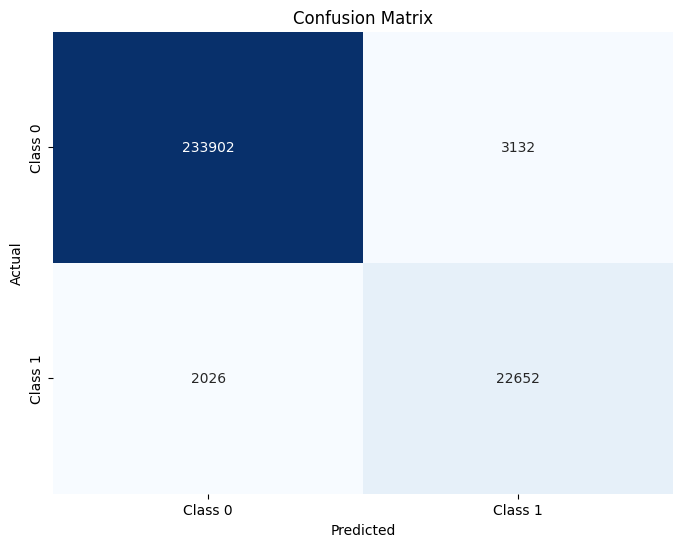

Training time: 108.157722 seconds
Inference time per sample: 2.94 microseconds


In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, balanced_accuracy_score, roc_curve, auc, confusion_matrix,
    PrecisionRecallDisplay
)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

# Assuming X and y are already defined and split into train and test sets (X_train, X_test, y_train, y_test)

# Measure training time
start_train_time = time.time()

# Initialize Gradient Boosting Classifier
boosting_clf = GradientBoostingClassifier(random_state=42)

# Fit the model
boosting_clf.fit(X, y)

end_train_time = time.time()

# Calculate training time in seconds
training_time_seconds = end_train_time - start_train_time

# Measure inference time
start_inference_time = time.time()

# Make predictions on the test set
y_pred = boosting_clf.predict(X_test)
y_pred_proba = boosting_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

end_inference_time = time.time()

# Calculate inference time per sample in microseconds
inference_time_seconds = end_inference_time - start_inference_time
num_samples = X_test.shape[0]
inference_time_per_sample_microseconds = (inference_time_seconds / num_samples) * 1_000_000

# Calculate overall metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Binary precision
recall = recall_score(y_test, y_pred, average='binary')        # Binary recall
f1 = f1_score(y_test, y_pred, average='binary')                # Binary F1-score
roc_auc = roc_auc_score(y_test, y_pred_proba)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Calculate class-wise metrics
precision_class = precision_score(y_test, y_pred, average=None)  # Class-wise precision
recall_class = recall_score(y_test, y_pred, average=None)        # Class-wise recall
f1_class = f1_score(y_test, y_pred, average=None)                # Class-wise F1-score
f2_class = fbeta_score(y_test, y_pred, beta=2, average=None)     # Class-wise F2-score

# Create a DataFrame to display overall and class-wise results
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC", "Balanced Accuracy"],
    "Overall Score": [accuracy, precision, recall, f1, roc_auc, balanced_acc],
})

# Create a DataFrame for class-wise metrics
class_wise_metrics = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-Score", "F2-Score"],
    "Class 0": [precision_class[0], recall_class[0], f1_class[0], f2_class[0]],
    "Class 1": [precision_class[1], recall_class[1], f1_class[1], f2_class[1]]
})

# Display the results
print("Overall Results:")
print(results)

print("\nClass-wise Results:")
print(class_wise_metrics)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the AUC-ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f'AUC-ROC Curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Print training and inference times
print(f"Training time: {training_time_seconds:.6f} seconds")
print(f"Inference time per sample: {inference_time_per_sample_microseconds:.2f} microseconds")


# RUSBoostClassifier

Overall Results:
              Metric  Overall Score
0           Accuracy       0.967124
1          Precision       0.741627
2             Recall       0.999595
3           F1-Score       0.851502
4            AUC-ROC       0.996172
5  Balanced Accuracy       0.981669

Class-wise Results:
      Metric   Class 0   Class 1
0  Precision  0.999956  0.741627
1     Recall  0.963744  0.999595
2   F1-Score  0.981516  0.851502
3   F2-Score  0.970775  0.934578


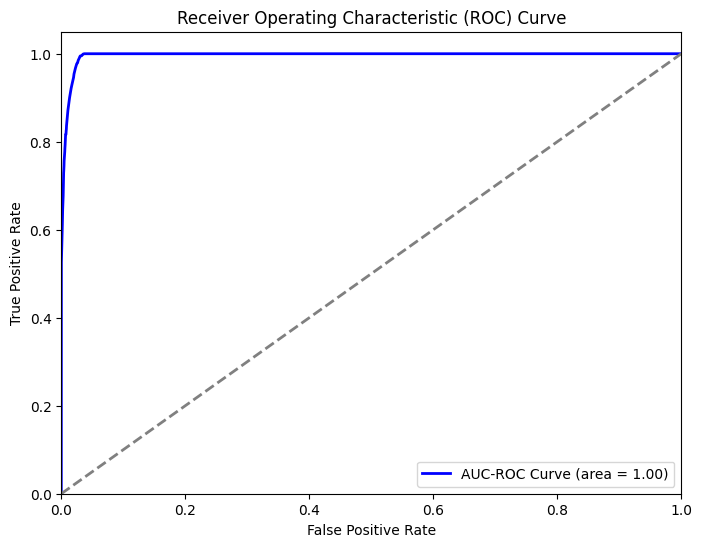

Training time: 25.289585 seconds
Inference time per sample: 12.70 microseconds


In [31]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, balanced_accuracy_score, roc_curve, auc, confusion_matrix,
    PrecisionRecallDisplay
)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

# Assuming X and y are already defined and split into train and test sets (X_train, X_test, y_train, y_test)

# Measure training time
start_train_time = time.time()

# Initialize RUSBoost Classifier
rus_clf = RUSBoostClassifier(random_state=42)

# Fit the model
rus_clf.fit(X, y)

end_train_time = time.time()

# Calculate training time in seconds
training_time_seconds = end_train_time - start_train_time

# Measure inference time
start_inference_time = time.time()

# Make predictions on the test set
y_pred = rus_clf.predict(X_test)
y_pred_proba = rus_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

end_inference_time = time.time()

# Calculate inference time per sample in microseconds
inference_time_seconds = end_inference_time - start_inference_time
num_samples = X_test.shape[0]
inference_time_per_sample_microseconds = (inference_time_seconds / num_samples) * 1_000_000

# Calculate overall metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Binary precision
recall = recall_score(y_test, y_pred, average='binary')        # Binary recall
f1 = f1_score(y_test, y_pred, average='binary')                # Binary F1-score
roc_auc = roc_auc_score(y_test, y_pred_proba)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Calculate class-wise metrics
precision_class = precision_score(y_test, y_pred, average=None)  # Class-wise precision
recall_class = recall_score(y_test, y_pred, average=None)        # Class-wise recall
f1_class = f1_score(y_test, y_pred, average=None)                # Class-wise F1-score
f2_class = fbeta_score(y_test, y_pred, beta=2, average=None)     # Class-wise F2-score

# Create a DataFrame to display overall and class-wise results
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC", "Balanced Accuracy"],
    "Overall Score": [accuracy, precision, recall, f1, roc_auc, balanced_acc],
})

# Create a DataFrame for class-wise metrics
class_wise_metrics = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-Score", "F2-Score"],
    "Class 0": [precision_class[0], recall_class[0], f1_class[0], f2_class[0]],
    "Class 1": [precision_class[1], recall_class[1], f1_class[1], f2_class[1]]
})

# Display the results
print("Overall Results:")
print(results)

print("\nClass-wise Results:")
print(class_wise_metrics)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the AUC-ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f'AUC-ROC Curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Print training and inference times
print(f"Training time: {training_time_seconds:.6f} seconds")
print(f"Inference time per sample: {inference_time_per_sample_microseconds:.2f} microseconds")


# EasyEnsemble

Overall Results:
              Metric  Overall Score
0           Accuracy       0.963624
1          Precision       0.721621
2             Recall       1.000000
3           F1-Score       0.838304
4            AUC-ROC       0.994536
5  Balanced Accuracy       0.979918

Class-wise Results:
      Metric   Class 0   Class 1
0  Precision  1.000000  0.721621
1     Recall  0.959837  1.000000
2   F1-Score  0.979507  0.838304
3   F2-Score  0.967609  0.928373


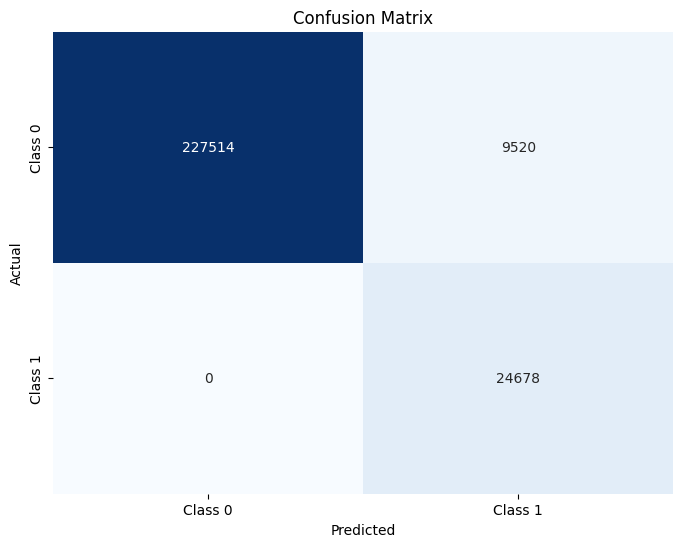

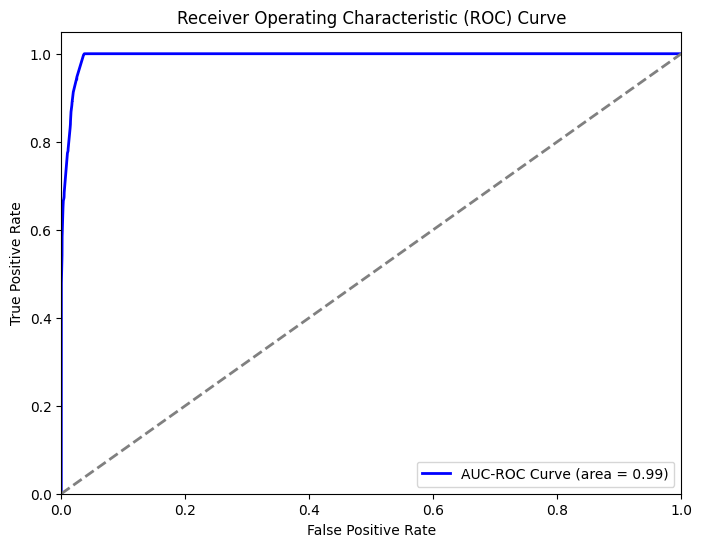

Training time: 67.263111 seconds
Inference time per sample: 58.71 microseconds


In [32]:
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, balanced_accuracy_score, roc_curve, auc, confusion_matrix,
    PrecisionRecallDisplay
)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

# Assuming X and y are already defined and split into train and test sets (X_train, X_test, y_train, y_test)

# Measure training time
start_train_time = time.time()

# Initialize Easy Ensemble Classifier
easy_ensemble_clf = EasyEnsembleClassifier(random_state=42)

# Fit the model
easy_ensemble_clf.fit(X, y)

end_train_time = time.time()

# Calculate training time in seconds
training_time_seconds = end_train_time - start_train_time

# Measure inference time
start_inference_time = time.time()

# Make predictions on the test set
y_pred = easy_ensemble_clf.predict(X_test)
y_pred_proba = easy_ensemble_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

end_inference_time = time.time()

# Calculate inference time per sample in microseconds
inference_time_seconds = end_inference_time - start_inference_time
num_samples = X_test.shape[0]
inference_time_per_sample_microseconds = (inference_time_seconds / num_samples) * 1_000_000

# Calculate overall metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Binary precision
recall = recall_score(y_test, y_pred, average='binary')        # Binary recall
f1 = f1_score(y_test, y_pred, average='binary')                # Binary F1-score
roc_auc = roc_auc_score(y_test, y_pred_proba)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Calculate class-wise metrics
precision_class = precision_score(y_test, y_pred, average=None)  # Class-wise precision
recall_class = recall_score(y_test, y_pred, average=None)        # Class-wise recall
f1_class = f1_score(y_test, y_pred, average=None)                # Class-wise F1-score
f2_class = fbeta_score(y_test, y_pred, beta=2, average=None)     # Class-wise F2-score

# Create a DataFrame to display overall and class-wise results
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC", "Balanced Accuracy"],
    "Overall Score": [accuracy, precision, recall, f1, roc_auc, balanced_acc],
})

# Create a DataFrame for class-wise metrics
class_wise_metrics = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-Score", "F2-Score"],
    "Class 0": [precision_class[0], recall_class[0], f1_class[0], f2_class[0]],
    "Class 1": [precision_class[1], recall_class[1], f1_class[1], f2_class[1]]
})

# Display the results
print("Overall Results:")
print(results)

print("\nClass-wise Results:")
print(class_wise_metrics)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the AUC-ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f'AUC-ROC Curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Print training and inference times
print(f"Training time: {training_time_seconds:.6f} seconds")
print(f"Inference time per sample: {inference_time_per_sample_microseconds:.2f} microseconds")


# XGBoost

Overall Results:
              Metric  Overall Score
0           Accuracy       0.981285
1          Precision       0.885605
2             Recall       0.920415
3           F1-Score       0.902675
4            AUC-ROC       0.996975
5  Balanced Accuracy       0.954018

Class-wise Results:
      Metric   Class 0   Class 1
0  Precision  0.991680  0.885605
1     Recall  0.987622  0.920415
2   F1-Score  0.989647  0.902675
3   F2-Score  0.988431  0.913236


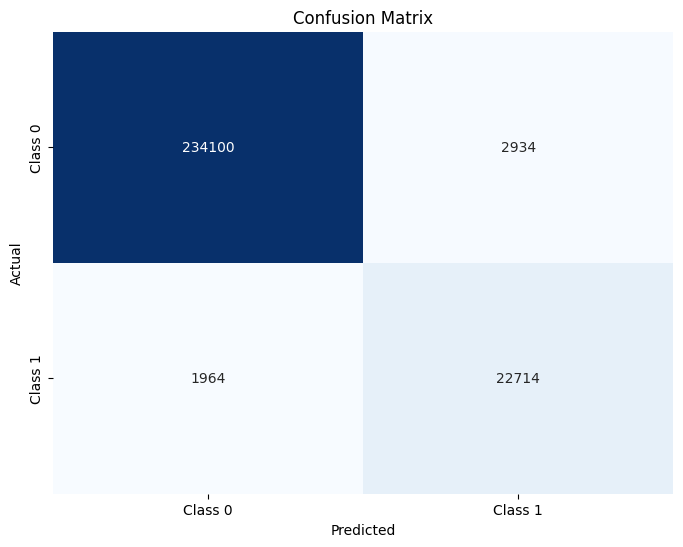

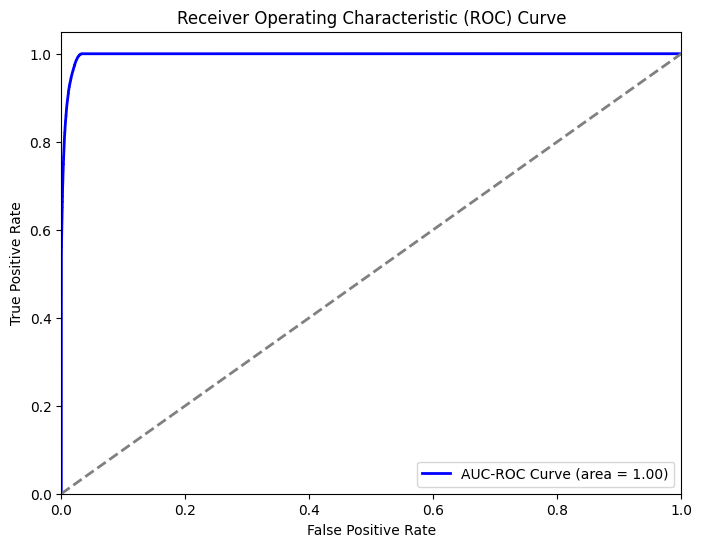

Training time: 5.101999 seconds
Inference time per sample: 1.62 microseconds


In [33]:
import xgboost as xgb
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, balanced_accuracy_score, roc_curve, auc, confusion_matrix,
    PrecisionRecallDisplay
)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

# Assuming X and y are already defined and split into train and test sets (X_train, X_test, y_train, y_test)

# Measure training time
start_train_time = time.time()

# Initialize XGBoost Classifier
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Fit the model
xgb_clf.fit(X, y)

end_train_time = time.time()

# Calculate training time in seconds
training_time_seconds = end_train_time - start_train_time

# Measure inference time
start_inference_time = time.time()

# Make predictions on the test set
y_pred = xgb_clf.predict(X_test)
y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

end_inference_time = time.time()

# Calculate inference time per sample in microseconds
inference_time_seconds = end_inference_time - start_inference_time
num_samples = X_test.shape[0]
inference_time_per_sample_microseconds = (inference_time_seconds / num_samples) * 1_000_000

# Calculate overall metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Binary precision
recall = recall_score(y_test, y_pred, average='binary')        # Binary recall
f1 = f1_score(y_test, y_pred, average='binary')                # Binary F1-score
roc_auc = roc_auc_score(y_test, y_pred_proba)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Calculate class-wise metrics
precision_class = precision_score(y_test, y_pred, average=None)  # Class-wise precision
recall_class = recall_score(y_test, y_pred, average=None)        # Class-wise recall
f1_class = f1_score(y_test, y_pred, average=None)                # Class-wise F1-score
f2_class = fbeta_score(y_test, y_pred, beta=2, average=None)     # Class-wise F2-score

# Create a DataFrame to display overall and class-wise results
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC", "Balanced Accuracy"],
    "Overall Score": [accuracy, precision, recall, f1, roc_auc, balanced_acc],
})

# Create a DataFrame for class-wise metrics
class_wise_metrics = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-Score", "F2-Score"],
    "Class 0": [precision_class[0], recall_class[0], f1_class[0], f2_class[0]],
    "Class 1": [precision_class[1], recall_class[1], f1_class[1], f2_class[1]]
})

# Display the results
print("Overall Results:")
print(results)

print("\nClass-wise Results:")
print(class_wise_metrics)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the AUC-ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f'AUC-ROC Curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Print training and inference times
print(f"Training time: {training_time_seconds:.6f} seconds")
print(f"Inference time per sample: {inference_time_per_sample_microseconds:.2f} microseconds")


# Performance comparison of Boosting methods

In [34]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import time
# from sklearn.metrics import (
#     accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
#     roc_auc_score, balanced_accuracy_score, roc_curve, auc, confusion_matrix,
#     average_precision_score, PrecisionRecallDisplay, precision_recall_curve
# )
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
# from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split
# from sklearn.base import BaseEstimator, ClassifierMixin, clone

# # Assuming X and y are already defined
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train = X
# y_train = y
# # Custom class to combine SMOTE with Bagging
# class SMOTEBaggingClassifier(BaseEstimator, ClassifierMixin):
#     def __init__(self, base_estimator=None, n_estimators=10, random_state=None):
#         self.base_estimator = base_estimator
#         self.n_estimators = n_estimators
#         self.random_state = random_state
#         self.estimators_ = []

#     def fit(self, X, y):
#         for _ in range(self.n_estimators):
#             # Resample with SMOTE
#             X_resampled, y_resampled = SMOTE(random_state=self.random_state).fit_resample(X, y)
#             estimator = clone(self.base_estimator)
#             estimator.fit(X_resampled, y_resampled)
#             self.estimators_.append(estimator)
#         return self

#     def predict(self, X):
#         predictions = np.array([estimator.predict(X) for estimator in self.estimators_])
#         return np.round(np.mean(predictions, axis=0)).astype(int)

#     def predict_proba(self, X):
#         probabilities = np.array([estimator.predict_proba(X) for estimator in self.estimators_])
#         return np.mean(probabilities, axis=0)

# # Dictionary to hold model results
# results = {}

# # Function to train and evaluate a model
# def train_and_evaluate_model(model, model_name):
#     start_train_time = time.time()
#     model.fit(X_train, y_train)
#     end_train_time = time.time()
    
#     # Measure inference time
#     start_inference_time = time.time()
#     y_pred = model.predict(X_test)
#     y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
#     end_inference_time = time.time()

#     # Calculate metrics
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, average='binary')
#     recall = recall_score(y_test, y_pred, average='binary')
#     f1 = f1_score(y_test, y_pred, average='binary')
#     roc_auc = roc_auc_score(y_test, y_pred_proba)
#     balanced_acc = balanced_accuracy_score(y_test, y_pred)

#     # Store results
#     results[model_name] = {
#         "model": model,  # Store the model instance
#         "accuracy": accuracy,
#         "precision": precision,
#         "recall": recall,
#         "f1": f1,
#         "roc_auc": roc_auc,
#         "balanced_acc": balanced_acc,
#         "training_time": end_train_time - start_train_time,
#         "inference_time_per_sample": (end_inference_time - start_inference_time) / len(X_test) * 1_000_000
#     }

# # 1. Decision Tree Classifier
# dt_clf = DecisionTreeClassifier(random_state=42)
# train_and_evaluate_model(dt_clf, "Decision Tree")

# # 2. Random Forest Classifier
# rf_clf = RandomForestClassifier(random_state=42)
# train_and_evaluate_model(rf_clf, "Random Forest")

# # 3. Balanced Random Forest Classifier (Undersampling)
# balanced_rf_clf = BalancedRandomForestClassifier(random_state=42)
# train_and_evaluate_model(balanced_rf_clf, "Balanced Random Forest")

# # 4. Balanced Bagging Classifier (Underbagging)
# underbagging_clf = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
# train_and_evaluate_model(underbagging_clf, "Balanced Bagging (Underbagging)")

# # 5. Balanced Bagging Classifier with Oversampling (SMOTE)
# smote_bagging_clf = SMOTEBaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
# train_and_evaluate_model(smote_bagging_clf, "SMOTEBagging (Oversampling)")

# # Plot AUC-ROC and Precision-Recall curves
# plt.figure(figsize=(16, 14))  # Increased figure size

# # AUC-ROC Curves
# plt.subplot(2, 1, 1)
# for model_name, metrics in results.items():
#     y_pred_proba = metrics["model"].predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
#     fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
#     plt.plot(fpr, tpr, label=f"{model_name} (AUC = {metrics['roc_auc']:.2f})")
# plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random predictions
# plt.title('AUC-ROC Curves for Different Models', fontsize=18)
# plt.xlabel('False Positive Rate', fontsize=14)
# plt.ylabel('True Positive Rate', fontsize=14)
# plt.legend(loc='lower right')
# plt.grid()

# # Precision-Recall Curves
# plt.subplot(2, 1, 2)
# for model_name, metrics in results.items():
#     y_pred_proba = metrics["model"].predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
#     precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
#     plt.plot(recall, precision, label=model_name)
# plt.title('Precision-Recall Curves for Different Models', fontsize=18)
# plt.xlabel('Recall', fontsize=14)
# plt.ylabel('Precision', fontsize=14)
# plt.legend(loc='lower right')
# plt.grid()

# plt.tight_layout()
# plt.show()

# # Display overall results
# for model_name, metrics in results.items():
#     print(f"Results for {model_name}:")
#     print(f"  Accuracy: {metrics['accuracy']:.4f}")
#     print(f"  Precision: {metrics['precision']:.4f}")
#     print(f"  Recall: {metrics['recall']:.4f}")
#     print(f"  F1 Score: {metrics['f1']:.4f}")
#     print(f"  AUC-ROC: {metrics['roc_auc']:.4f}")
#     print(f"  Balanced Accuracy: {metrics['balanced_acc']:.4f}")
#     print(f"  Training Time: {metrics['training_time']:.4f} seconds")
#     print(f"  Inference Time per Sample: {metrics['inference_time_per_sample']:.2f} microseconds")
#     print("\n")


Overall Results:
              Metric  Overall Score
0           Accuracy       0.981308
1          Precision       0.888845
2             Recall       0.916363
3           F1-Score       0.902394
4            AUC-ROC       0.996957
5  Balanced Accuracy       0.952216

Class-wise Results:
      Metric   Class 0   Class 1
0  Precision  0.991264  0.888845
1     Recall  0.988069  0.916363
2   F1-Score  0.989664  0.902394
3   F2-Score  0.988707  0.910724


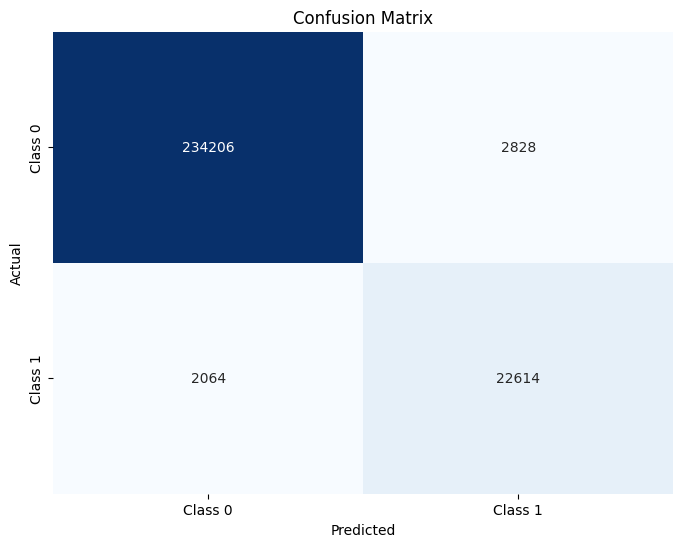

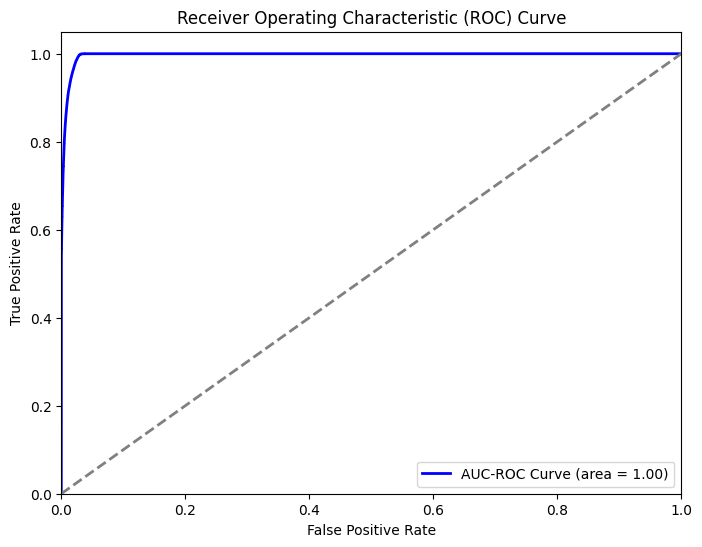

Training time: 95.934441 seconds
Inference time per sample: 1.54 microseconds


In [36]:
import catboost as cb
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, balanced_accuracy_score, roc_curve, auc, confusion_matrix
)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

# Assuming X and y are already defined and split into train and test sets (X_train, X_test, y_train, y_test)

# Measure training time
start_train_time = time.time()

# Initialize CatBoost Classifier
cat_clf = cb.CatBoostClassifier(random_state=42, verbose=0, eval_metric='Logloss')  # Suppress output with verbose=0

# Fit the model
cat_clf.fit(X, y)

end_train_time = time.time()

# Calculate training time in seconds
training_time_seconds = end_train_time - start_train_time

# Measure inference time
start_inference_time = time.time()

# Make predictions on the test set
y_pred = cat_clf.predict(X_test)
y_pred_proba = cat_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

end_inference_time = time.time()

# Calculate inference time per sample in microseconds
inference_time_seconds = end_inference_time - start_inference_time
num_samples = X_test.shape[0]
inference_time_per_sample_microseconds = (inference_time_seconds / num_samples) * 1_000_000

# Calculate overall metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Binary precision
recall = recall_score(y_test, y_pred, average='binary')        # Binary recall
f1 = f1_score(y_test, y_pred, average='binary')                # Binary F1-score
roc_auc = roc_auc_score(y_test, y_pred_proba)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Calculate class-wise metrics
precision_class = precision_score(y_test, y_pred, average=None)  # Class-wise precision
recall_class = recall_score(y_test, y_pred, average=None)        # Class-wise recall
f1_class = f1_score(y_test, y_pred, average=None)                # Class-wise F1-score
f2_class = fbeta_score(y_test, y_pred, beta=2, average=None)     # Class-wise F2-score

# Create a DataFrame to display overall and class-wise results
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC", "Balanced Accuracy"],
    "Overall Score": [accuracy, precision, recall, f1, roc_auc, balanced_acc],
})

# Create a DataFrame for class-wise metrics
class_wise_metrics = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-Score", "F2-Score"],
    "Class 0": [precision_class[0], recall_class[0], f1_class[0], f2_class[0]],
    "Class 1": [precision_class[1], recall_class[1], f1_class[1], f2_class[1]]
})

# Display the results
print("Overall Results:")
print(results)

print("\nClass-wise Results:")
print(class_wise_metrics)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the AUC-ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f'AUC-ROC Curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Print training and inference times
print(f"Training time: {training_time_seconds:.6f} seconds")
print(f"Inference time per sample: {inference_time_per_sample_microseconds:.2f} microseconds")
